# Gender Recogmiser

## Importing the libraries

In [39]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import joblib
from skimage.io import imread,imshow
from skimage.transform import resize

## Preparing the datasets

Here wwe define a function to read,resize and store the data in a dictionary, containing the images,labels(gender),original filename and description. The image themselves are stored as numpy arrays containing the RGB values. The dictionary is saved into a pickle file using joblib.

In [3]:
# def resize_all(src,pklname,include,width=150,height=None):
#     '''
#     load images from path, resize them and then write them as arrays to a dictionarytogether with labels and metadata. The disctionary is 
#     written to a pickle names '{pklname}_{width}x{height}px.pkl'.
#     Parameters
#     --------------------------------
#     src: str
#         path to data
#     pklname: str
#         path to output file
#     width: int
#         target width of the image in pixels
#     include: set[str]
#         set containing str
#     '''
#     height=height if height is not None else width
#     data=dict()
#     data['discription']='resized ({0} x {1}) image in rgb'.format(int(width), int(height))
#     data['label']=[]
#     data['filename']=[]
#     data['data']=[]
#     pklname=f'{pklname}_{width}x{height}px.pkl'
#     for subdir in os.listdir(src):
#         if subdir in include:
#             print(subdir)
#             current_path=os.path.join(src, subdir)
#             for file in os.listdir(current_path):


In [16]:
image_path_men=[]
image_path_women=[]
mainpath_men='gender-recogniser/dataset/MEN'
mainpath_women='gender-recogniser/dataset/WOMAN'
for path in os.listdir(mainpath_men):
    print(path)
    image_path_men.append(os.path.join(mainpath_men, path))
print(image_path_men)
for path in os.listdir(mainpath_women):
    print(path)
    image_path_women.append(os.path.join(mainpath_women, path))
print(image_path_women)


20240609_175821.jpg
20240609_175941.jpg
20240609_175959.jpg
20240609_180022.jpg
20240609_180035.jpg
20240609_180108.jpg
20240609_180139.jpg
20240609_180204.jpg
20240609_180239.jpg
20240609_180301.jpg
20240609_180315.jpg
20240609_180342.jpg
20240609_180401.jpg
20240609_180425.jpg
20240609_180459.jpg
20240609_180525.jpg
20240609_180539.jpg
20240609_180559.jpg
20240609_180614.jpg
20240609_180631.jpg
20240609_180651.jpg
20240609_180708.jpg
20240609_180726.jpg
20240609_180743.jpg
20240609_180807.jpg
20240609_180826.jpg
20240609_180848.jpg
20240609_180904.jpg
20240609_180945.jpg
20240609_181003.jpg
20240609_181030.jpg
20240609_181052.jpg
20240609_181137.jpg
20240609_181158.jpg
20240609_181209.jpg
20240609_181224.jpg
20240609_181243.jpg
20240609_181258.jpg
20240609_181318.jpg
20240609_181336.jpg
20240609_181351.jpg
20240609_181405.jpg
20240609_181431.jpg
20240609_181443.jpg
20240609_181455.jpg
20240609_181507.jpg
20240609_181529.jpg
20240609_181541.jpg
20240609_181603.jpg
20240609_181629.jpg


In [36]:
width=150
height=150
i=0
destination_path='gender-recogniser/combined_dataset/'
for path in image_path_men:
    img=imread(path,plugin='matplotlib')
    img=resize(img,(width,height))
    pklname=f'{i}_{width}x{height}px_M.pkl'
    joblib.dump(img,open(f'{destination_path}_{pklname}','wb'))
    i=i+1
    # print(img.shape)

In [37]:
width=150
height=150
i=646
destination_path='gender-recogniser/combined_dataset/'
for path in image_path_women:
    img=imread(path,plugin='matplotlib')
    img=resize(img,(width,height))
    pklname=f'{i}_{width}x{height}px_W.pkl'
    joblib.dump(img,open(f'{destination_path}_{pklname}','wb'))
    i=i+1

(150, 150, 3)


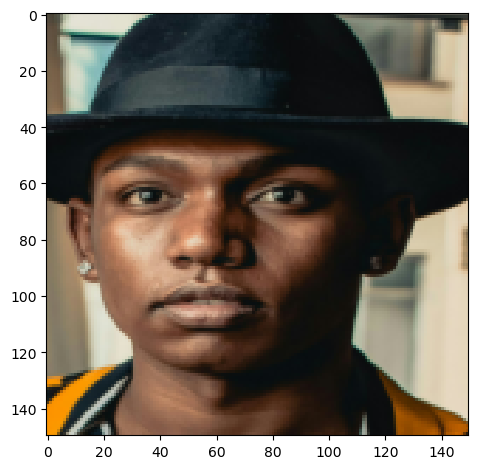

In [45]:
data=joblib.load("gender-recogniser\combined_dataset\_0_150x150px_M.pkl")
img=imshow(data)
print(data.shape)

In [18]:
final_database=dict()
final_database['path']=[]
final_database['label']=[]
for path in image_path_women:
    final_database['path'].append(path)
    final_database['label'].append(0)
for path in image_path_men:
    final_database['path'].append(path)
    final_database['label'].append(1)

In [24]:
print(final_database)

{'path': ['gender-recogniser/dataset/WOMAN\\0001.jpg', 'gender-recogniser/dataset/WOMAN\\0002.jpg', 'gender-recogniser/dataset/WOMAN\\0003.jpg', 'gender-recogniser/dataset/WOMAN\\0005.jpg', 'gender-recogniser/dataset/WOMAN\\0006.jpg', 'gender-recogniser/dataset/WOMAN\\0007.jpg', 'gender-recogniser/dataset/WOMAN\\0008.jpg', 'gender-recogniser/dataset/WOMAN\\0009.jpg', 'gender-recogniser/dataset/WOMAN\\0010.jpg', 'gender-recogniser/dataset/WOMAN\\0011.jpg', 'gender-recogniser/dataset/WOMAN\\0012.jpg', 'gender-recogniser/dataset/WOMAN\\0013.jpg', 'gender-recogniser/dataset/WOMAN\\0014.jpg', 'gender-recogniser/dataset/WOMAN\\0015.jpg', 'gender-recogniser/dataset/WOMAN\\0016.jpg', 'gender-recogniser/dataset/WOMAN\\0017.jpg', 'gender-recogniser/dataset/WOMAN\\0018.jpg', 'gender-recogniser/dataset/WOMAN\\0019.jpg', 'gender-recogniser/dataset/WOMAN\\0020.jpg', 'gender-recogniser/dataset/WOMAN\\0021.jpg', 'gender-recogniser/dataset/WOMAN\\0022.jpg', 'gender-recogniser/dataset/WOMAN\\0023.jpg', 

In [26]:
for path in final_database['path']:
    print(path)
    img=imread(path,plugin='pil')
    print(img.shape)

gender-recogniser/dataset/WOMAN\0001.jpg
(691, 713, 3)
gender-recogniser/dataset/WOMAN\0002.jpg
(122, 121, 3)
gender-recogniser/dataset/WOMAN\0003.jpg
(514, 517, 3)
gender-recogniser/dataset/WOMAN\0005.jpg
(276, 354, 3)
gender-recogniser/dataset/WOMAN\0006.jpg
(247, 250, 3)
gender-recogniser/dataset/WOMAN\0007.jpg
(516, 517, 3)
gender-recogniser/dataset/WOMAN\0008.jpg
(762, 673, 3)
gender-recogniser/dataset/WOMAN\0009.jpg
(125, 132, 3)
gender-recogniser/dataset/WOMAN\0010.jpg
(364, 348, 3)
gender-recogniser/dataset/WOMAN\0011.jpg
(129, 152, 3)
gender-recogniser/dataset/WOMAN\0012.jpg
(394, 297, 3)
gender-recogniser/dataset/WOMAN\0013.jpg
(626, 575, 3)
gender-recogniser/dataset/WOMAN\0014.jpg
(514, 414, 3)
gender-recogniser/dataset/WOMAN\0015.jpg
(514, 514, 3)
gender-recogniser/dataset/WOMAN\0016.jpg
(270, 295, 3)
gender-recogniser/dataset/WOMAN\0017.jpg
(579, 544, 3)
gender-recogniser/dataset/WOMAN\0018.jpg
(415, 276, 3)
gender-recogniser/dataset/WOMAN\0019.jpg
(584, 520, 3)
gender-rec